In this notebook I will run Khodabandeloo et al. (2021) code for viscous elastic model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
SaveDir=SaveDir='./ve_results/'
TextfileName_cod='ve_CodLarvae.txt'
TextfileName_lima='ve_limacina.txt'
TXTDirFile_cod=SaveDir+TextfileName_cod
TXTDirFile_lima=SaveDir+TextfileName_lima

import os
#os.chdir('//home/bkh/OnlineCourses/BackScattering/BackscatterAnalyticSpheres/')
from FUNC_Stable3_GasSphere_ElasticShellViscFlesh import func_GasSphere_ElasticShell_ViscousShell

## Function to run model over a range of frequencies

In [3]:
def run_ve(Freq_vec, M_order, params):
    """Function to run the viscous elastic model (Khodabandeloo et al. 2021) for a range of frequencies
    Freq_vec: frequency vector
    M_order: number of modes included
    params: dictionary including a value for each model parameter required (R2,R3,R4,ro1,ro2,ro3,ro4,c1,c2,c3,c4,Eta2,Mu3,Landa3)
    """ 
    cntr=0
    TS_vec=[]
    for freq in Freq_vec:
        min_freq=freq
        max_freq=min_freq
        frequencyNumbers=1
        cntr=cntr+1
        
        SUM_Am_Pm_h_k1_R_inf_Vec=np.zeros(1,dtype=complex)
        
        for m_order in range(0,M_order):
            [Am_Vec, Am_Pm_h_k1_R_inf_Vec]=func_GasSphere_ElasticShell_ViscousShell(m_order,
                                                                                      params['R2'],
                                                                                      params['R3'],
                                                                                      params['R4'],
                                                                                      params['ro1'],
                                                                                      params['ro2'],
                                                                                      params['ro3'],
                                                                                      params['ro4'],
                                                                                      params['c1'],
                                                                                      params['c2'],
                                                                                      params['c3'],
                                                                                      params['c4'],
                                                                                      params['Eta2'],
                                                                                      params['Mu3'],
                                                                                      params['Landa3'],
                                                                                      min_freq,
                                                                                      max_freq,
                                                                                      frequencyNumbers)
                
            SUM_Am_Pm_h_k1_R_inf_Vec=SUM_Am_Pm_h_k1_R_inf_Vec+Am_Pm_h_k1_R_inf_Vec  

        TS=10*np.log10((abs(SUM_Am_Pm_h_k1_R_inf_Vec))**2)
        TS_vec=np.append(TS_vec,TS)

    return TS_vec
    

In [4]:
def write_ve(fname_txt, M_order, params, F_TS_MAT):
    """|||||||||||||||   Save into txt file   |||||||||||||||||||||||||||| 
    fname_txt: Name of the txt file to save values.
    M_order: number of modes included
    params: dictionary including a value for each model parameter required (R2,R3,R4,ro1,ro2,ro3,ro4,c1,c2,c3,c4,Eta2,Mu3,Landa3)
    F_TS_MAT: frequency vector and ts results concatenated
    """
    with open(TXTDirFile_cod, 'w') as f:
        csv.writer(f, delimiter=' ').writerows(F_TS_MAT_cod)  

    # Add header
    Parameters='M='+str(M_order-1)+' GasRadii_m_(R4)='+str(params_cod['R4'])+' R3='+str(params_cod['R3'])+' R2='+str(params_cod['R2'])+ \
               ' ro_water_(ro1)='+str(params_cod['ro1'])+' ro_gas_(ro4)='+str(params_cod['ro4'])+' ro_shell_(ro3)='+str(params_cod['ro3'])+' ro_flesh_(ro2)='+str(params_cod['ro2'])+ \
               ' c_water_(c1)='+str(params_cod['c1'])+' c_gas (c4)='+str(params_cod['c4'])+' c_shell_(c3)='+str(params_cod['c3'])+' c_flesh_(c2)='+str(params_cod['c2'])+' Kisi='+str(params_cod['Kisi2'])+ \
               ' Shear_Rigidity_(mu3)='+str(params_cod['Mu3'])+' Compressional_rigidity_of_elastic_shell_(Landa3)='+str(params_cod['Landa3']) 


    headers = Parameters.split()

    with open(TXTDirFile_cod,'r+') as infile:
      content = infile.read()
      infile.seek(0,0)
      infile.write("\t".join(headers)+"\n"+content)
    
    return

# Determine model parameters


Start with cod larvae
Parameters descibed in ViscousElasticModelparams.xlsx

In [19]:
M_order=5

ro1=1027    # Surronding Water density  "kg/m³"
ro2=1040  # Surronding viscouis layer (fish flesh) density  "kg/m³"
ro3=1141  # Elastic sphere Density "kg/m³"
ro4=51.3  # Inner Gas Sphere Density "kg/m³"

c1=1462    # Surronding Water speed of sound "m/s" @ 4,3deg 31,2 PSU
c2=1523    # Surronding viscouis layer (fish flesh) speed of sound "m/s"
#c3=1480    # Elastic sphere speed of sound "m/s"
c4=325.1    # gas speed of sound "m/s"

Eta2=2*0.428572
Mu2=Eta2
Kisi2=Mu2+4*Eta2/3
    
Mu3=0.17*1.0E6  # "N/m²" shear rigidity of elastic shell
Landa3=2.4*1E9  # "N/m²" Compressional rigidity of elastic shell

c3=(ro3/(Landa3+2*Mu3))**-0.5    # Elastic sphere speed of sound "m/s"
    
Delta=0.01*1E-3 # Swimbladder wall thickness
R4=0.14*1E-3 #0.001  # (m) radius of gas sphere
R3=R4+Delta  # (m) radius of elastic shell 
#R2=2*1E-3  # (m) radius till viscous layer
R2=R4*( (1+(ro1-ro4)/(ro2-ro1))**(1/3) ) # Eq 18 in our JASA mesopelagic paper


In [20]:
params_cod ={'R2':R2,
            'R3':R3,
            'R4':R4,
            'ro1':ro1,
            'ro2':ro2,
            'ro3':ro3,
            'ro4':ro4,
            'c1':c1,
            'c2':c2,
            'c3':c3,
            'c4':c4,
            'Eta2':Eta2,
            'Mu3':Mu3,
            'Landa3':Landa3,
            'Kisi2':Kisi2}

In [8]:
min_freq=100*1000
max_freq=600*1000
frequencySpacing=100

Freq_vec=np.arange(min_freq,max_freq,frequencySpacing) 

### Run for cod larvae

In [22]:
TS_vec_cod = run_ve(Freq_vec, M_order, params_cod)

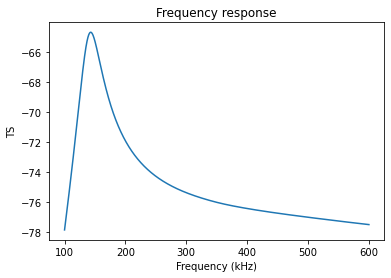

In [23]:
plt.plot(Freq_vec/1000,TS_vec_cod,label='2.5mm Spheroid, Asp R=4, Theta =90')  
plt.xlabel('Frequency (kHz)')
plt.ylabel('TS')
plt.title('Frequency response')
plt.show()  


In [24]:
## Save data into matrix
F_TS_MAT_cod=np.concatenate((Freq_vec.reshape(-1,1),TS_vec_cod.reshape(-1,1)),axis=1)

## Limacina VE model run
Now Limacina Parameters descibed in ViscousElasticModelparams.xlsx

In [9]:
M_order=5 # Means it will run from order 0 to M_order-1.

ro1=1027    # Surronding Water density  "kg/m³"
ro2=1040  # Surronding viscouis layer (fish flesh) density  "kg/m³"
ro3=2717.442  # Elastic sphere Density "kg/m³"
ro4=3315.2  # Inner Gas Sphere Density "kg/m³"

c1=1480    # Surronding Water speed of sound "m/s" @ 4,3deg 31,2 PSU
c2=1523    # Surronding viscouis layer (fish flesh) speed of sound "m/s"
#c3=1480    # Elastic sphere speed of sound "m/s"
c4=2721.55    # gas speed of sound "m/s"

Eta2=2*0.428572
Mu2=Eta2
Kisi2=Mu2+4*Eta2/3
    
Mu3=35800*1.0E6  # "N/m²" shear rigidity of elastic shell / Gpa = 1e6 N/m2
Landa3=2.4*1E9  # "N/m²" Compressional rigidity of elastic shell

c3=(ro3/(Landa3+2*Mu3))**-0.5    # Elastic sphere speed of sound "m/s"
    
Delta=2.3*1E-3 # Swimbladder wall thickness
R3=0.933*1E-3  # (m) radius of elastic shell 
R4=R3-(R3*Delta)  # (m) radius of gas sphere
#R2=2*1E-3  # (m) radius till viscous layer
R2=R3 # Eq 18 in our JASA mesopelagic paper


In [10]:
params_lima ={'R2':R2,
            'R3':R3,
            'R4':R4,
            'ro1':ro1,
            'ro2':ro2,
            'ro3':ro3,
            'ro4':ro4,
            'c1':c1,
            'c2':c2,
            'c3':c3,
            'c4':c4,
            'Eta2':Eta2,
            'Mu3':Mu3,
            'Landa3':Landa3,
            'Kisi2':Kisi2}

## Run for Limacina

In [11]:
TS_vec_lima = run_ve(Freq_vec, M_order, params_lima)

## Plot results

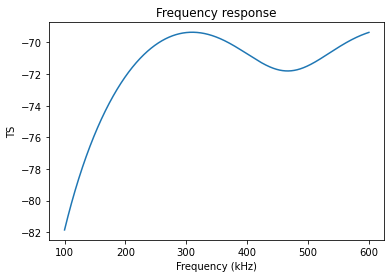

In [12]:
#plt.plot(FreqVec/1000,TS_vec,linestyle='-',marker='s',markersize=4,label='2.5mm Spheroid, Asp R=4, Theta =90')  
plt.plot(Freq_vec/1000,TS_vec_lima,label='2.5mm Spheroid, Asp R=4, Theta =90')  
plt.xlabel('Frequency (kHz)')
plt.ylabel('TS')
plt.title('Frequency response')
plt.show()  

#plt.plot(R4*2*np.pi*Freq_vec/c1,TS_vec,color=[0.6,0.6,0.6],linestyle='-',label='2.5mm Spheroid, Asp R=4, Theta =90')  
#plt.show()  

### Save in matrix

In [29]:
F_TS_MAT_lima=np.concatenate((Freq_vec.reshape(-1,1),TS_vec_lima.reshape(-1,1)),axis=1)
   

## Write to file
cod

In [30]:
write_ve(TXTDirFile_cod, M_order, params_cod, F_TS_MAT_cod)

limacina

In [32]:
write_ve(TXTDirFile_lima, M_order, params_lima, F_TS_MAT_lima)